<a href="https://colab.research.google.com/github/bialyy10/Uczenie_maszynowe_w_finansach_1/blob/main/case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files


uploaded = files.upload()

Saving case1.csv to case1 (2).csv


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv("case1.csv", sep = ";",encoding = 'utf-8',) #pominięcie wierszy zawierające błędy

Część 1. Przygotowanie danych

In [21]:
df.shape

(9841, 51)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [23]:
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [24]:
data_cleaned = df.drop(columns=['Unnamed: 0', 'Index', 'Address']) #usunięcie niepotrzebnych kolumn

In [25]:
data_cleaned.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [26]:
brakujace_wartosci = data_cleaned.isnull().sum()
brakujace_wartosci

FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contract                                 0
max val sent to contract

In [27]:
# Wypełnianie brakujących wartości średnią tylko dla kolumn liczbowych
kolumny_liczbowe = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

for column in kolumny_liczbowe:
    if data_cleaned[column].isnull().any():
        data_cleaned[column].fillna(data_cleaned[column].mean(), inplace=True)

# Sprawdzenie ponownie brakujących wartości w kolumnach liczbowych
brakujace_wartosci_2 = data_cleaned[kolumny_liczbowe].isnull().sum()

brakujace_wartosci_2 #Po wyniku widzimy że nie ma juz brakujących wartości


FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [28]:
#sprawdzenie unikatowych wartości dla kolumn tekstowych
kolumna_tekst1 = 'ERC20_most_rec_token_type'
kolumna_tekst2 = 'ERC20 most sent token type'
unikalne_wartosci_kol1 = {kolumna_tekst1: data_cleaned[kolumna_tekst1].nunique()}
unikalne_wartosci_kol2 = {kolumna_tekst2: data_cleaned[kolumna_tekst2].nunique()}
print(unikalne_wartosci_kol1)
print(unikalne_wartosci_kol2)

{'ERC20_most_rec_token_type': 466}
{'ERC20 most sent token type': 304}


In [30]:
#Ze względu na duże braki danych (2697 oraz 871) oraz dużą liczbę unikalnych wartości postanowiłem usunąć te 2 kolumny
data_cleaned = data_cleaned.drop(columns=['ERC20_most_rec_token_type', 'ERC20 most sent token type'], errors='ignore')



In [31]:
data_cleaned

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,1.500000e+07,2.655861e+05,0.000000,1.683100e+07,2.717799e+05,0.0,0.0,0.0,39.000000,57.000000
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,3.650000e+02,5.763262e+01,2.260809,2.260809e+00,2.260809e+00,0.0,0.0,0.0,1.000000,7.000000
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,4.428198e+02,6.518901e+01,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,8.000000
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,1.141223e+04,1.555550e+03,100.000000,9.029231e+03,3.804077e+03,0.0,0.0,0.0,1.000000,11.000000
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,9.000000e+04,4.934232e+03,0.000000,4.500000e+04,1.372666e+04,0.0,0.0,0.0,6.000000,27.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,1.337000e+00,6.685000e-01,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,1.337000e+01,1.337000e+01,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,1.500000e+03,3.006939e+02,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,5.000000
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,1.252524e+08,4.346203e+06,11741.257297,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676


In [32]:
scaler = StandardScaler()
features = data_cleaned.drop('FLAG', axis=1)
# Standaryzacja zmiennych
features_scaled = scaler.fit_transform(features)

features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
features_scaled_df.head()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,-0.197465,-0.299436,1.506411,0.799099,-0.079402,-0.02637,0.032280,0.349346,-0.134530,-0.036696,...,-0.010934,-0.019916,-0.011646,0.003361,-0.010683,0.0,0.0,0.0,5.836461,3.269052
1,0.354760,-0.218644,3.096367,-0.028965,-0.165500,-0.02637,-0.084931,-0.044882,-0.134530,-0.040016,...,-0.012422,-0.021212,-0.011644,-0.011546,-0.011164,0.0,0.0,0.0,-0.059727,0.136175
2,11.221900,-0.241365,0.924051,-0.150467,-0.163375,-0.02637,-0.068187,-0.090370,-0.134183,-0.040128,...,-0.012422,-0.021212,-0.011646,-0.011546,-0.011164,0.0,0.0,0.0,-0.214890,0.198833
3,0.238893,0.337091,0.555004,-0.120091,-0.164437,-0.02637,-0.078233,-0.048673,-0.134530,-0.001780,...,-0.012421,-0.021205,-0.011547,-0.011538,-0.011157,0.0,0.0,0.0,-0.059727,0.386805
4,-0.235055,0.117108,0.508294,5.919361,-0.152745,-0.01930,-0.078233,-0.025929,-0.134530,-0.039233,...,-0.012413,-0.021188,-0.011646,-0.011506,-0.011139,0.0,0.0,0.0,0.716087,1.389326


Część 2. Redukcja wymiarów

In [34]:
#Analiza PCA
from sklearn.decomposition import PCA

array([0.12189046, 0.22712806, 0.31375807, 0.38791688, 0.45588658,
       0.51292218, 0.56652631, 0.6113159 , 0.65286158, 0.6910385 ,
       0.72586114, 0.75772504, 0.78407327, 0.81037413, 0.83509313,
       0.85899006, 0.88092143, 0.89968719, 0.91709223, 0.9328023 ,
       0.94524595, 0.95541481, 0.96514922, 0.9738124 , 0.97983682,
       0.98574371, 0.99115327, 0.9960199 , 0.99996624, 0.99998457,
       0.99999268, 0.99999844, 0.99999949, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [35]:
# Przeprowadzenie analizy PCA
pca = PCA()
pca.fit(features_scaled)

# Kumulatywna suma wyjaśnionej wariancji
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

cumulative_variance

array([0.12189046, 0.22712806, 0.31375807, 0.38791688, 0.45588658,
       0.51292218, 0.56652631, 0.6113159 , 0.65286158, 0.6910385 ,
       0.72586114, 0.75772504, 0.78407327, 0.81037413, 0.83509313,
       0.85899006, 0.88092143, 0.89968719, 0.91709223, 0.9328023 ,
       0.94524595, 0.95541481, 0.96514922, 0.9738124 , 0.97983682,
       0.98574371, 0.99115327, 0.9960199 , 0.99996624, 0.99998457,
       0.99999268, 0.99999844, 0.99999949, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

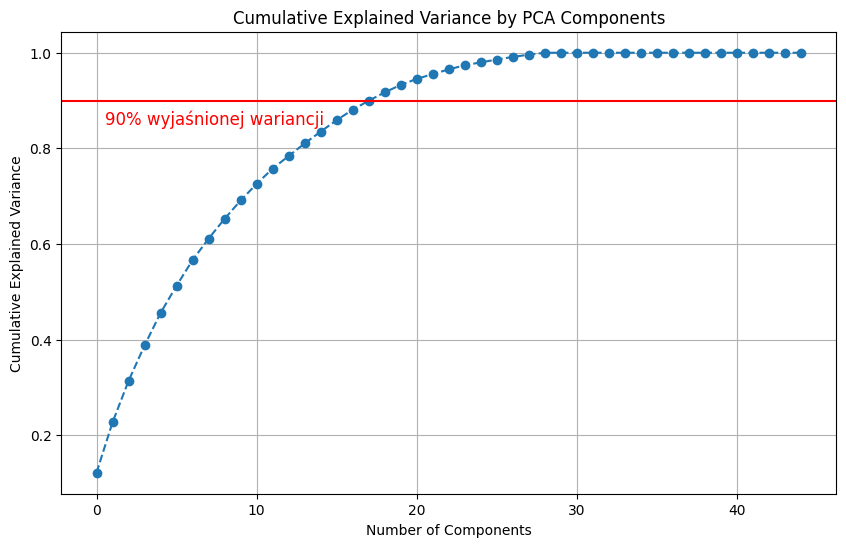

In [43]:
# Tworzenie wykresu kumulatywnej sumy wyjaśnionej wariancji
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)

# Dodanie linii odciętych dla 90% wyjaśnionej wariancji
plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% wyjaśnionej wariancji', color = 'red', fontsize=12)

plt.show()
#Na wykresie widać że wystarczy 17 komponentów aby osiągnąc 90% wyjaśnionej wariancji, ja zdecyduje się na wybór 27 komponentów. Ta liczba zapewnia niemal 100% wyjaśnionej wariancji

In [39]:
# Przeprowadzenie PCA z 27 komponentami
pca_27 = PCA(n_components=27)
features_reduced = pca_27.fit_transform(features_scaled)

# Wymiary zredukowanych danych
features_reduced.shape


(9841, 27)

Część 3. Zbilansowanie częściowe próbki, stworzenie modeli

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Przygotowanie danych do modelowania
X = features_reduced
y = data_cleaned['FLAG']

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Zastosowanie SMOTE do zbilansowania zbioru treningowego
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
knn_clf = KNeighborsClassifier()

Cześć 4. Ocena Modeli

In [42]:
# Lista modeli do walidacji krzyżowej
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "K-Nearest Neighbors": knn_clf
}

# Walidacja krzyżowa i ocena modeli
scores = {}
for name, model in models.items():
    cv_score = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy').mean()
    scores[name] = cv_score


print("Wynik walidacji:")
for name, score in scores.items():
    print(f"{name}: {score:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Wynik walidacji:
Logistic Regression: 0.7358
Random Forest: 0.9788
K-Nearest Neighbors: 0.9596


Wybór modelu:

Najlepszym modelem okazał się model **Random Forest** uzyskał on 97,88% dokładności, najwięcej ze wszystkich modeli. Tak wysoki wyniki oznacza, że model bardzo dobrze kalsyfikuje czy dana stransakcja była oszustwem, czy nie.